In [15]:
import pynance
from pathlib import Path
import torch
import pandas as pd

In [16]:
# next line should be commented
from pydatatools.utils import user
data_path = Path(user.get_item_from_user_cfg(section="pie", item="path_to_data"))
print(data_path)

/home/paul/Documents/repertoires/DATA/pie


<AxesSubplot:title={'center':'1 year price history for index CAC40'}, xlabel='Date'>

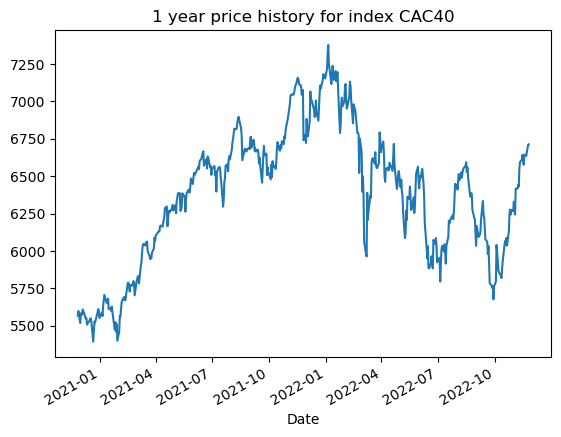

In [22]:
# df = pd.read_excel(data_path / "dataEurope.xlsx") # NOT what we want for market ...

market_name = "^CAC"
import pandas_datareader.data as pdr
from datetime import date, datetime
end = date.today()
start = datetime(year=end.year-2, month=end.month, day=end.day-2)
# More information of the datasource:
df = pdr.get_data_stooq(market_name, start, end)
df['Close'].plot(title='1 year price history for index CAC40')

In [23]:
times_series = df["Close"]   

In [8]:
# defining the RNN model
rnn = pynance.model.forecasting.TFnaive(
    input_size=1,
    hidden_size=2,
    num_layers=2
)


In [9]:
# Optim
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)

TFnaive(
  (rnn): LSTM(1, 2, proj_size=1, num_layers=2)
)